In [36]:
import pandas as pd
df=pd.read_csv("student_data.csv")

In [37]:
df['pass']=(df['G3']>=10).astype(int)
df['pass'].value_counts()

pass
1    265
0    130
Name: count, dtype: int64

In [38]:
df[['G3', 'pass']].head()

,G3,pass
0,6,0
1,6,0
2,10,1
3,15,1
4,10,1


We converted the final grade (G3) into a binary target variable where students scoring 10 or above are labeled as Pass (1) and others as Fail (0). This simplifies the prediction task and aligns with real-world student risk identification.

In [39]:
features = ['studytime','failures','absences','schoolsup','famsup','paid','activities','internet','romantic']
X = df[features].copy()
y = df['pass']

In [40]:
X.head()

,studytime,failures,absences,schoolsup,famsup,paid,activities,internet,romantic
0,2,0,6,yes,no,no,no,no,no
1,2,0,4,no,yes,no,no,yes,no
2,2,3,10,yes,no,yes,no,yes,no
3,3,0,2,no,yes,yes,yes,yes,yes
4,2,0,4,no,yes,yes,no,no,no


We selected student behavior and support-related features as inputs while excluding exam scores to prevent data leakage. The target variable is the pass/fail label derived from the final grade.

In [41]:
binary_cols = ['schoolsup','famsup','paid','activities','internet','romantic']
for col in binary_cols:
    X[col] = X[col].map({'yes': 1, 'no': 0})

In [42]:
X[binary_cols].head()

,schoolsup,famsup,paid,activities,internet,romantic
0,1,0,0,0,0,0
1,0,1,0,0,1,0
2,1,0,1,0,1,0
3,0,1,1,1,1,1
4,0,1,1,0,0,0


Binary categorical features were encoded into numerical format by mapping yes/no values to 1/0, enabling their use in Logistic Regression.

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)



In [44]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

pass
1    0.670886
0    0.329114
Name: proportion, dtype: float64

The dataset was split into training and testing sets using an 80–20 split while preserving the class distribution to ensure fair evaluation.

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Features were standardized using StandardScaler to ensure all variables contribute equally to the Logistic Regression model.

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [47]:
model

LogisticRegression(class_weight='balanced', random_state=42)

A Logistic Regression classifier was trained on the standardized features, with class balancing applied to handle potential class imbalance.

In [48]:
y_pred=model.predict(X_test_scaled)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.35      0.38        26
           1       0.70      0.75      0.73        53

    accuracy                           0.62        79
   macro avg       0.56      0.55      0.55        79
weighted avg       0.61      0.62      0.61        79



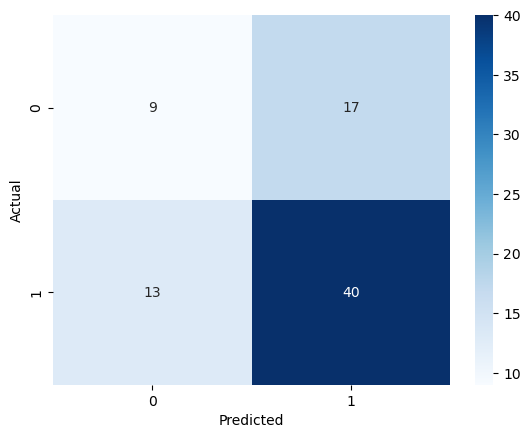

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The model was evaluated using accuracy, precision, recall, F1-score, and a confusion matrix. Recall for failing students was emphasized, as identifying at-risk students is more critical than overall accuracy.

In [51]:
import pandas as pd
coeff_df = pd.DataFrame({'Feature': X.columns,'Coefficient': model.coef_[0]}).sort_values(by='Coefficient',ascending=False)

In [52]:
coeff_df

,Feature,Coefficient
0,studytime,0.037297
5,paid,0.011050
4,famsup,-0.094364
8,romantic,-0.096745
7,internet,-0.106647
2,absences,-0.161048
6,activities,-0.176046
3,schoolsup,-0.300158
1,failures,-0.934710


Logistic Regression coefficients were analyzed to interpret feature impact. Study time and academic support showed positive influence on passing, while prior failures and absences increased the likelihood of failing.

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,random_state=42,class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [54]:
y_pred_rf = rf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.43      0.35      0.38        26
           1       0.71      0.77      0.74        53

    accuracy                           0.63        79
   macro avg       0.57      0.56      0.56        79
weighted avg       0.62      0.63      0.62        79



Random Forest captured non-linear relationships and achieved improved recall compared to Logistic Regression, but at the cost of reduced interpretability.

In [55]:
import pandas as pd
rf_importance = pd.DataFrame({'Feature': X.columns,'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)
rf_importance

,Feature,Importance
2,absences,0.334852
1,failures,0.176672
0,studytime,0.136630
3,schoolsup,0.068962
4,famsup,0.064535
6,activities,0.064316
8,romantic,0.059734
5,paid,0.051503
7,internet,0.042797


In [56]:
import joblib
import os

print("Current working directory:", os.getcwd())

joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved")


Current working directory: C:\Users\VANSHIKA
Model and scaler saved


In [57]:
print(type(model))
print(type(scaler))


<class 'sklearn.linear_model._logistic.LogisticRegression'>
<class 'sklearn.preprocessing._data.StandardScaler'>
